# Anime Recommendation System - Muhammad Rizki Putra
## Domain Project
---

#### Judul
Pengembangan Sistem Rekomendasi Anime Menggunakan Metode Collaborative Filtering

#### Latar Belakang
Industri anime global telah mengalami lonjakan popularitas dan volume produksi yang signifikan, dengan ribuan judul baru dirilis setiap tahunnya dan dapat diakses melalui berbagai platform digital di seluruh dunia. Menurut laporan industri (misalnya, dari Statista atau Research and Markets), pasar anime global terus menunjukkan tren pertumbuhan yang positif, mencerminkan peningkatan minat dan jangkauan konsumen secara luas. Ketersediaan konten yang melimpah ini, meskipun memberikan banyak pilihan, seringkali menimbulkan fenomena information overload, di mana pengguna menghadapi kesulitan untuk menemukan dan memilih anime yang sesuai dengan preferensi serta selera individual mereka di tengah katalog yang begitu besar dan beragam.

untuk penjelasan lebih lengkap dapat dilihat di `Laporan Proyek.md`

## Business Understanding
---

### Goals
- Membangun sebuah sistem rekomendasi anime yang mampu memberikan saran judul anime secara personal dan relevan kepada pengguna.
- Mengimplementasikan dan mengevaluasi dua pendekatan utama dalam sistem rekomendasi:
    1.  **Content-Based Filtering**, yang merekomendasikan anime berdasarkan kemiripan fitur antar anime.
    2.  **Collaborative Filtering**, yang merekomendasikan anime berdasarkan pola preferensi dari banyak pengguna.
- Mengevaluasi dan membandingkan kinerja algoritma spesifik dalam pendekatan Collaborative Filtering (misalnya, Singular Value Decomposition (SVD) dan K-Nearest Neighbors (KNN)).
- Menentukan pendekatan atau model rekomendasi yang paling efektif berdasarkan metrik evaluasi yang sesuai, seperti RMSE/MAE untuk prediksi rating dan/atau Precision@k/Recall@k untuk kualitas daftar rekomendasi top-N.
- Menyediakan dasar untuk pengembangan sistem yang dapat meningkatkan pengalaman pengguna dalam menemukan dan menikmati konten anime.

## Data Understanding
---

Sumber dataset: [Anime Recommendations Database - Kaggle](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data)

Dataset yang digunakan dalam proyek ini adalah **Anime Recommendations Database**, yang dapat diunduh secara publik melalui platform Kaggle. Dataset ini bertujuan untuk menyediakan data yang dapat digunakan untuk membangun sistem rekomendasi anime, membantu pengguna menemukan tontonan baru berdasarkan preferensi dan perilaku pengguna lain, serta karakteristik anime itu sendiri.

Dataset ini terdiri dari dua file CSV utama, yaitu `anime.csv` dan `rating.csv`.

### Visualization & Explanatory Analysis
---

Tahap visualisasi data dilakukan untuk menyajikan hasil analisis dalam bentuk grafik dan diagram yang lebih mudah dipahami. Teknik visualisasi seperti histogram, scatter plot, heatmap, dan box plot digunakan untuk melihat distribusi data, hubungan antar variabel, serta pola yang mungkin muncul dalam dataset.

Selain itu, dilakukan explanatory analysis untuk menjelaskan temuan dari proses eksplorasi dan pemodelan. Interpretasi visualisasi membantu dalam mengidentifikasi tren signifikan, anomali, serta wawasan penting yang dapat digunakan untuk pengambilan keputusan.

Dengan pendekatan ini, hasil analisis menjadi lebih informatif dan dapat disajikan dengan cara yang jelas serta mudah dipahami.

### Import Library
Melakukan import library untuk mendukung analisis data dalam laporan ini. Pustaka seperti Pandas, NumPy, dan Matplotlib digunakan untuk manipulasi data, analisis statistik, serta visualisasi hasil.

In [1]:
# Manipulasi Data
import numpy as np
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection dan Tuning
from sklearn.model_selection import RandomizedSearchCV

# Algoritma Klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Misc
from sklearn.preprocessing import MultiLabelBinarizer
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

### Gathering Data
Pada tahap ini, kita membaca 2 file csv yang dibutuhkan, yaitu: anime.csv dan rating.csv

In [2]:
source_dir_anime = "/kaggle/input/anime-recommendations-database/anime.csv"
source_dir_rating = "/kaggle/input/anime-recommendations-database/rating.csv"
destination_dir = "/kaggle/working/submission"

In [3]:
anime_df = pd.read_csv(source_dir_anime,delimiter=",")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_df = pd.read_csv(source_dir_rating,delimiter=",")
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Exploratory Data Analysis (EDA)

dilakukan untuk memahami karakteristik data sebelum proses pemodelan. Analisis ini mencakup pemeriksaan distribusi data, deteksi nilai kosong, identifikasi anomali

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
rating_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [9]:
anime_df.duplicated().sum()

0

In [10]:
rating_df.duplicated().sum()

1

In [11]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Penjelasan : 

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum.
- 25% adalah kuartil pertama.
- 50% adalah kuartil kedua.
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [12]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


**Insight**

Dari EDA, ditemukan beberapa data kotor antara lain :
- Dari `anime_df` kolom `genre` terdapat 62 baris kosong, dan `rating` terdapat 230 baris kosong.
- Pada `rating_df` terdapat 1 baris yang duplikat.
- `episodes` Pada `anime_df` masih dalam bentuk `object` yang seharusnya dalam bentuk `int`.
- Pada `rating` dalam `rating_df` nilai paling kecil adalah `-1` dimana seharusnya rentang skor rating hanya dari 1-10.

### Data Visualization

Visualisasi data dilakukan untuk memahami pola dan hubungan antar variabel dalam dataset. Dengan menggunakan grafik seperti histogram, scatter plot, dan heatmap, data dapat ditampilkan dengan lebih intuitif sehingga memudahkan analisis. Teknik visualisasi yang tepat dapat membantu dalam mengidentifikasi tren, distribusi, serta anomali yang mungkin terjadi dalam data.

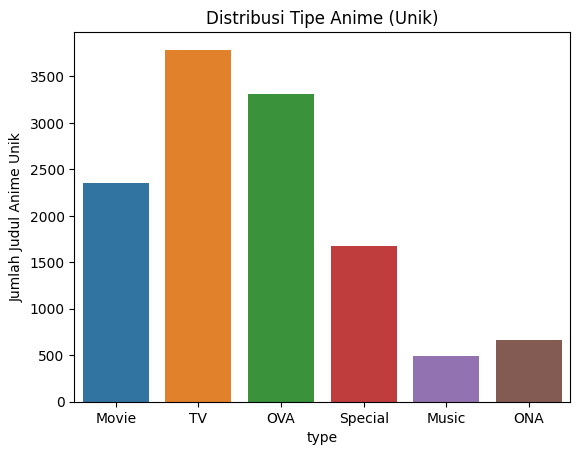

In [13]:
sns.countplot(x='type', data=anime_df)
plt.title('Distribusi Tipe Anime (Unik)')
plt.ylabel('Jumlah Judul Anime Unik')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


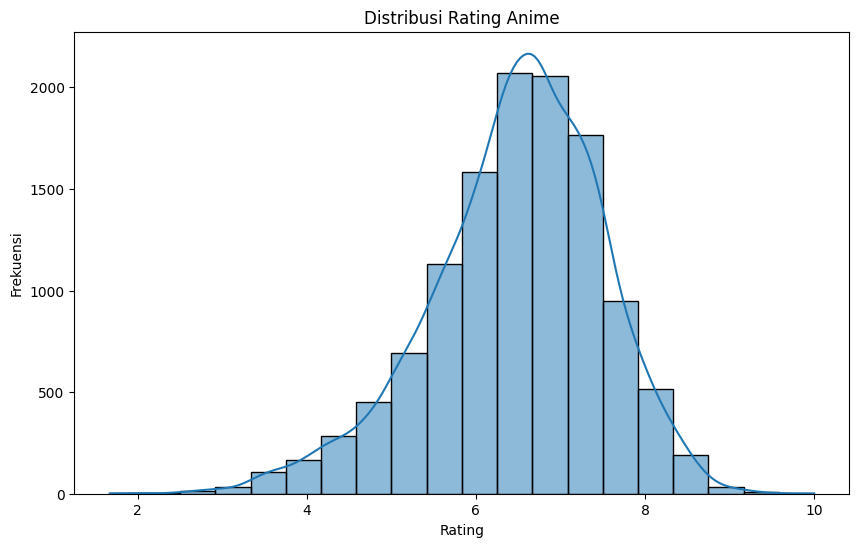

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], kde=True, bins=20)
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

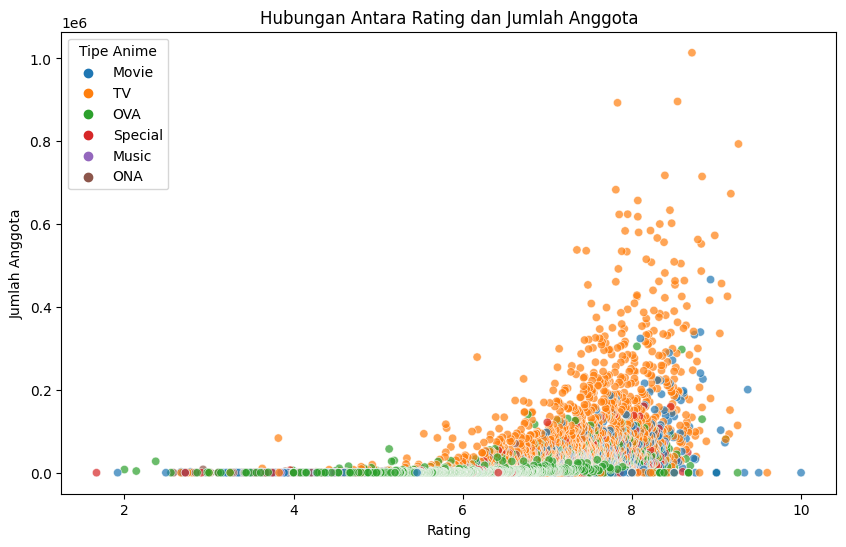

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='members', data=anime_df, hue='type', alpha=0.7)
plt.title('Hubungan Antara Rating dan Jumlah Anggota')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anggota')
plt.legend(title='Tipe Anime')
plt.show()

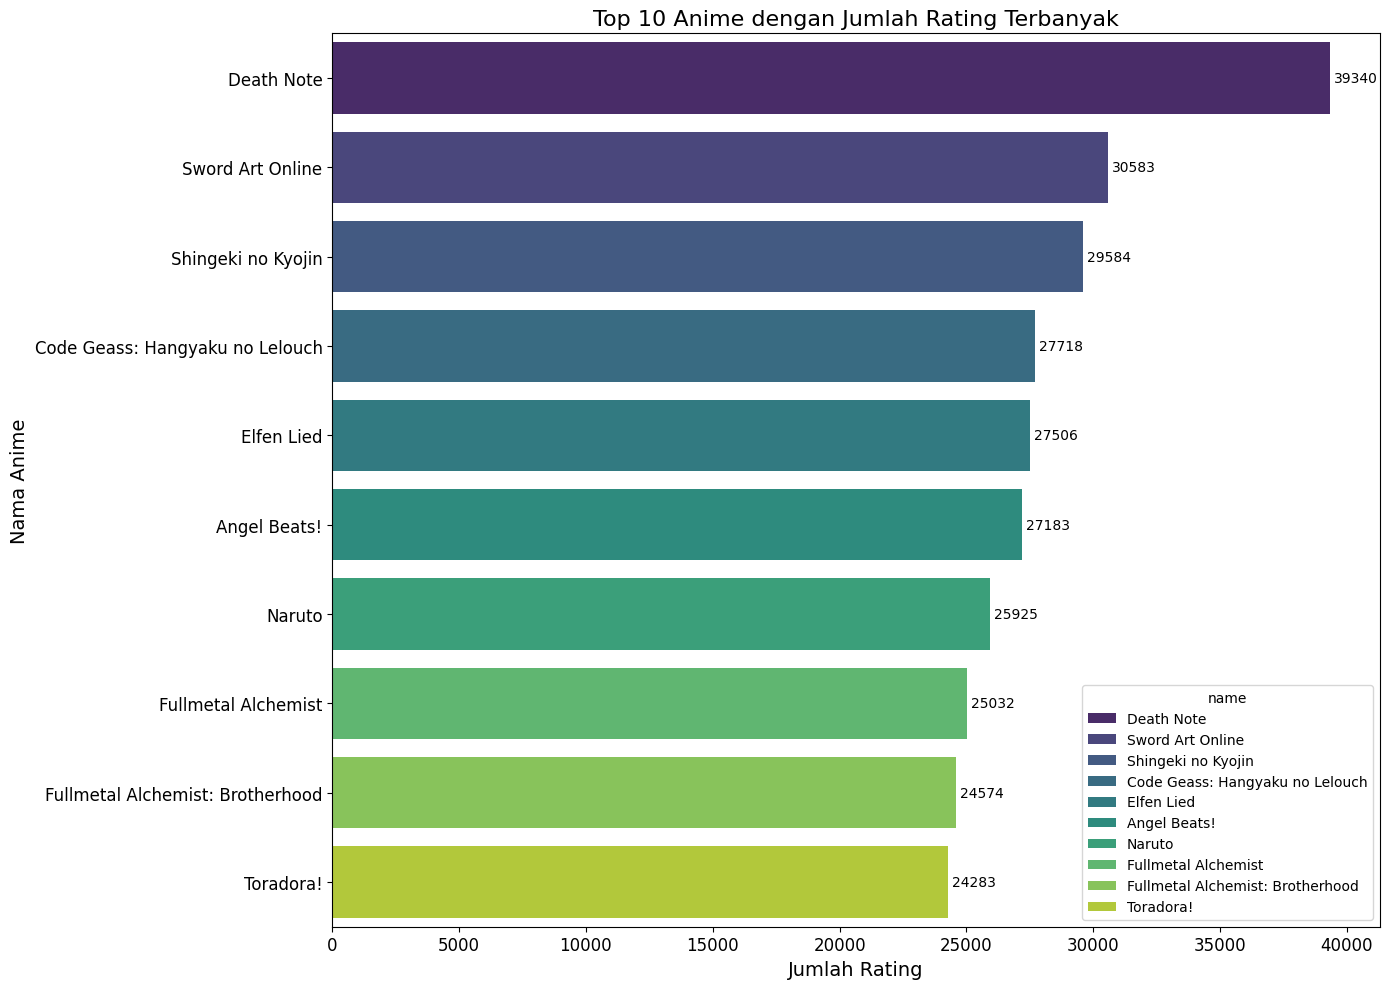

In [16]:
most_rated_anime = rating_df.groupby(by='anime_id')['user_id'].count()
most_rated_anime_sorted = most_rated_anime.sort_values(ascending=False).head(10)

most_rated_df = most_rated_anime_sorted.reset_index()
most_rated_df.columns = ['anime_id', 'rating_count']

if 'anime_df' in locals() or 'anime_df' in globals():
    if all(col in anime_df.columns for col in ['anime_id', 'name']):
        merged_top_rated = pd.merge(most_rated_df, anime_df[['anime_id', 'name']], on='anime_id', how='left')
    else:
        print("Peringatan: anime_df tidak memiliki kolom 'anime_id' atau 'name'. Visualisasi akan menggunakan anime_id.")
        merged_top_rated = most_rated_df.copy()
        merged_top_rated['name'] = merged_top_rated['anime_id'].astype(str) 
else:
    print("Peringatan: DataFrame 'anime_df' tidak ditemukan. Visualisasi akan menggunakan anime_id.")
    merged_top_rated = most_rated_df.copy()
    merged_top_rated['name'] = merged_top_rated['anime_id'].astype(str)

plt.figure(figsize=(14, 10)) # Atur ukuran gambar agar lebih mudah dibaca

plot = sns.barplot(x='rating_count', y='name', data=merged_top_rated, palette='viridis', hue='name', dodge=False)

plt.title('Top 10 Anime dengan Jumlah Rating Terbanyak', fontsize=16)
plt.xlabel('Jumlah Rating', fontsize=14)
plt.ylabel('Nama Anime', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i in plot.containers:
    plot.bar_label(i, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout() 
plt.show()

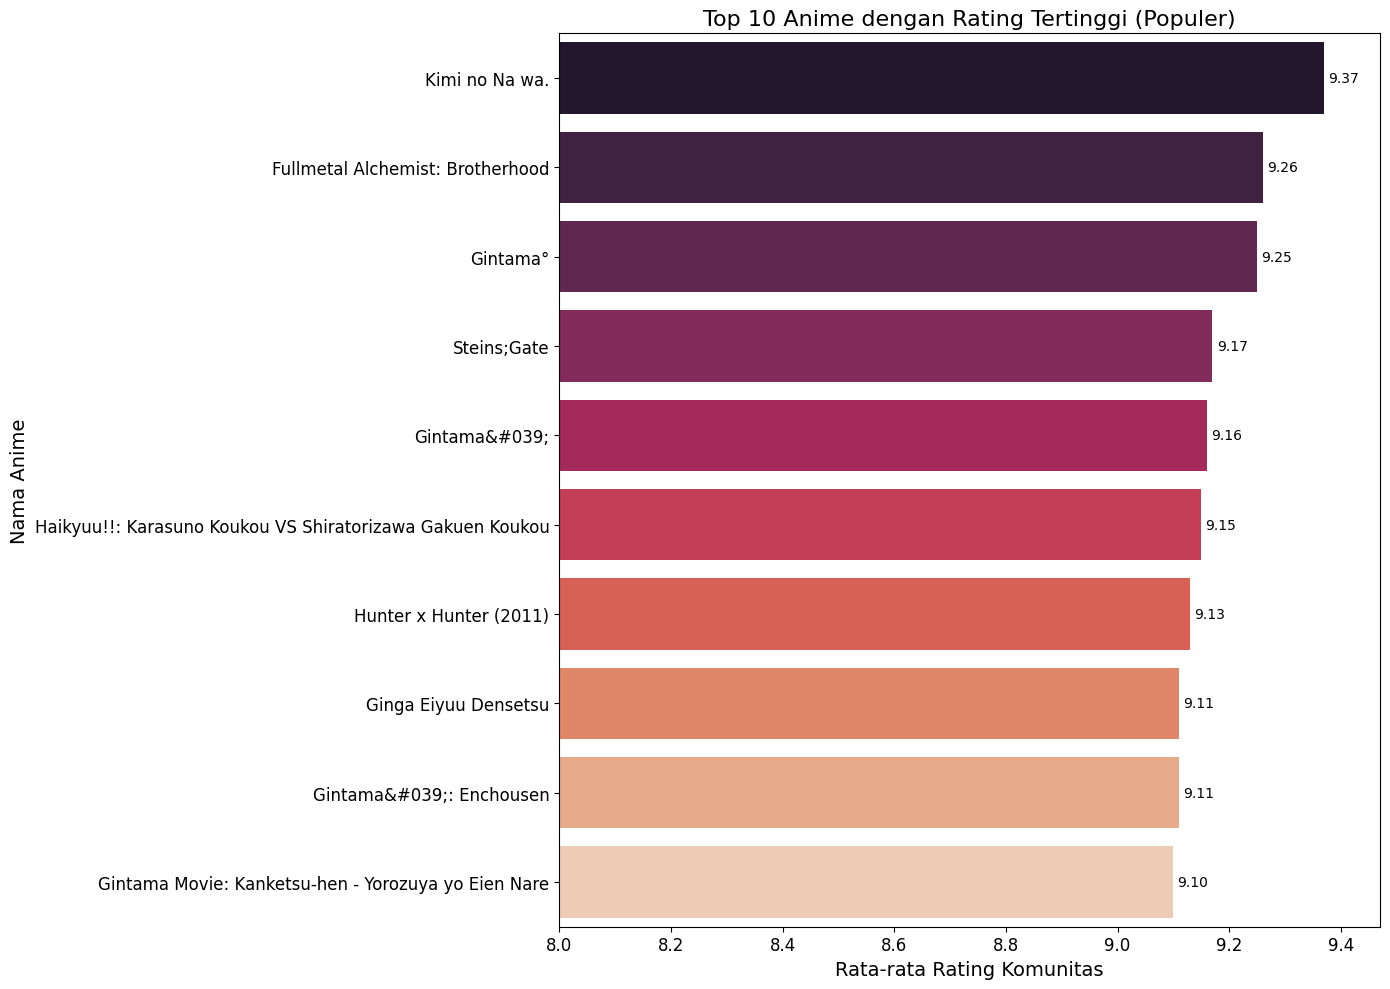

In [17]:
min_members_threshold = 50000 # Contoh: minimal 50,000 members
popular_anime_df = anime_df[anime_df['members'] >= min_members_threshold].copy()
highest_rated_popular_anime = popular_anime_df.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(14, 10)) # Atur ukuran gambar

plot_hr = sns.barplot(x='rating', y='name', data=highest_rated_popular_anime, palette='rocket', hue='name', dodge=False)

plt.title('Top 10 Anime dengan Rating Tertinggi (Populer)', fontsize=16)
plt.xlabel('Rata-rata Rating Komunitas', fontsize=14)
plt.ylabel('Nama Anime', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

if not highest_rated_popular_anime.empty:
    min_display_rating = min(8.0, highest_rated_popular_anime['rating'].min() - 0.1)
    max_display_rating = highest_rated_popular_anime['rating'].max() + 0.1
    plt.xlim(min_display_rating, max_display_rating)

for i in plot_hr.containers:
    plot_hr.bar_label(i, fmt='%.2f', label_type='edge', fontsize=10, padding=3) # '%.2f' untuk menampilkan 2 angka desimal

if plot_hr.legend_ is not None:
    plot_hr.legend_.remove()

plt.tight_layout()
plt.show()

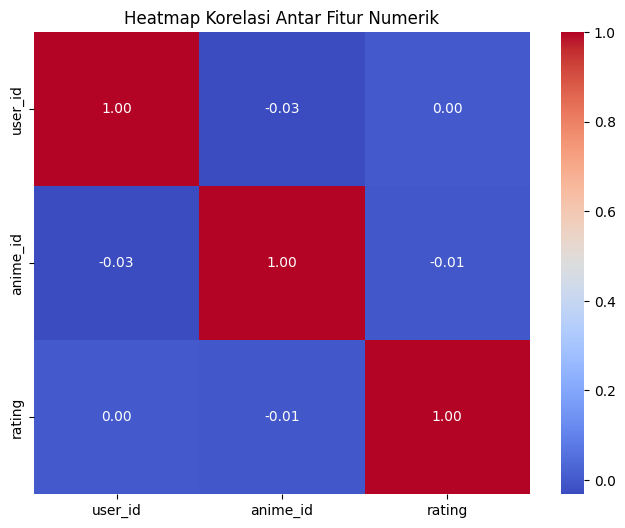

In [18]:
numerical_features = rating_df
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

**Insight**

---

1. Dataset Overview
Dua dataset utama digunakan dalam proyek ini: `anime.csv` dan `rating.csv`.

* **`anime_df` (dari `anime.csv`)**:
    * **Jumlah data awal:** 12.294 entri anime.
    * **Jumlah fitur:** 7 kolom awal (`anime_id`, `name`, `genre`, `type`, `episodes`, `rating`, `members`). Fitur `genre_list` ditambahkan selama persiapan data.
    * **Tipe Fitur**:
        * **Numerik**: `anime_id` (setelah pembersihan, `episodes` juga menjadi numerik/float), `rating`, `members`.
        * **Kategorikal/Object**: `name`, `genre`, `type`.
* **`rating_df` (dari `rating.csv`)**:
    * **Jumlah data awal:** 7.813.737 entri rating.
    * **Jumlah fitur:** 3 kolom (`user_id`, `anime_id`, `rating`).
    * **Tipe Fitur**: Semuanya numerik (`int64`).

---

2. Ringkasan Exploratory Data Analysis (EDA)

* **Kualitas Data Awal `anime_df`**:
    * **Nilai Hilang**: Ditemukan pada kolom `genre` (62 nilai), `type` (25 nilai), dan `rating` (230 nilai).
    * **Tipe Data**: Kolom `episodes` awalnya bertipe `object` dan mengandung nilai non-numerik seperti "Unknown".
    * **Duplikat**: Tidak ada data duplikat pada `anime_df`.
* **Kualitas Data Awal `rating_df`**:
    * **Nilai Hilang**: Tidak ada nilai hilang pada kolom utama.
    * **Duplikat**: Terdapat 1 baris data duplikat.
    * **Nilai Rating Khusus**: Kolom `rating` memiliki nilai `-1` yang mengindikasikan anime telah ditonton tetapi tidak diberi rating oleh pengguna.

Hasil EDA akan ditindaklanjutkan pada bagian `data preparation`

---

3. Statistik Deskriptif Fitur Numerik Utama

`anime_df`
| Statistik | anime_id   | rating    | members       |
|-----------|------------|-----------|---------------|
| count     | 12294      | 12064     | 12294         |
| mean      | 14058.22   | 6.47      | 18071.34      |
| std       | 11455.29   | 1.03      | 54820.68      |
| min       | 1          | 1.67      | 5             |
| 25%       | 3484.25    | 5.88      | 225           |
| 50%       | 10260.50   | 6.57      | 1550          |
| 75%       | 24794.50   | 7.18      | 9437          |
| max       | 34527      | 10.00     | 1013917       |

`rating_df`
| Statistik | user_id    | anime_id  | rating   |
|-----------|------------|-----------|----------|
| count     | 7813737    | 7813737   | 7813737  |
| mean      | 36727.96   | 8909.07   | 6.14     |
| std       | 20997.95   | 8883.95   | 3.73     |
| min       | 1          | 1         | -1.00    |
| 25%       | 18974      | 1240      | 6.00     |
| 50%       | 36791      | 6213      | 7.00     |
| 75%       | 54757      | 14093     | 9.00     |
| max       | 73516      | 34519     | 10.00    |

---

4. Insight Tambahan Berdasarkan Visualisasi

* **Distribusi Tipe Anime (`anime_df`)**:
    * Tipe anime yang paling umum adalah **`TV`**, diikuti oleh `Movie`, `OVA`, `Special`, `ONA`, dan `Music`.
* **Distribusi Rating Anime (`anime_df`)**:
    * Distribusi rating anime (dari komunitas) cenderung normal dengan puncak di sekitar skor 6 hingga 8.
* **Hubungan Rating dan Jumlah Anggota (`anime_df`)**:
    * Terdapat tren umum bahwa anime dengan **rating lebih tinggi cenderung memiliki jumlah anggota (popularitas) yang lebih tinggi** juga.
    * Anime tipe `TV` tersebar luas di berbagai tingkat rating dan jumlah anggota.
* **Heatmap Korelasi Fitur (`rating_df`)**:
    * Korelasi positif lemah (0.29) antara `anime_id` dan `rating` pengguna.
    * Korelasi lainnya sangat lemah.
* **Top 10 Anime dengan Jumlah Rating Terbanyak (`rating_df_cleaned` & `anime_df`)**:
    * Anime seperti "Death Note", "Code Geass", "Shingeki no Kyojin", dan "Sword Art Online" memiliki jumlah rating paling banyak dari pengguna, menunjukkan popularitas interaksi yang tinggi di dataset ini.

---

5. Rencana/Langkah Persiapan Data (yang telah dilakukan sebelum pemodelan)
Langkah-langkah persiapan data yang telah dilakukan untuk menyiapkan data sebelum proses pemodelan meliputi:

* **Pembersihan Data** : Melakukan pembersihan data hasil dari EDA.
* **Parsing Fitur `genre` (`anime_df`)**: Kolom `genre` yang berisi string genre dipisahkan koma telah di-parse menjadi list genre individual dan disimpan dalam kolom baru `genre_list`.
* **Encoding Fitur Kategorikal**:
    * **`genre_list` (`anime_df`)**: Dilakukan encoding menggunakan `MultiLabelBinarizer` untuk mengubah list genre menjadi representasi numerik biner (one-hot encoding untuk multi-label).
    * **`type` (`anime_df`)**: Dilakukan one-hot encoding menggunakan `pd.get_dummies` untuk mengubah fitur tipe anime menjadi representasi numerik.
* **Persiapan Data untuk Pustaka Surprise**:
    * `rating_df_cleaned` (setelah penghapusan rating -1) digunakan.
    * Objek `Reader` dari pustaka Surprise dikonfigurasi untuk skala rating 1-10.
    * Dataset dimuat ke dalam format `Dataset` Surprise menggunakan `load_from_df`.
    * Dataset kemudian dibagi menjadi `trainset` dan `testset` (80:20) untuk melatih dan mengevaluasi model Collaborative Filtering.

## Data Preparation
---

Data Preparation merupakan tahap krusial dalam siklus proyek *machine learning* yang bertujuan untuk membersihkan, mentransformasi, dan menyusun data mentah agar siap digunakan untuk pelatihan dan evaluasi model. Kualitas data yang baik pada tahap ini sangat menentukan performa dan keandalan model yang akan dibangun.

Dalam proyek sistem rekomendasi anime ini, proses persiapan data melibatkan langkah-langkah berikut, yang disesuaikan dengan urutan operasi dalam *notebook* implementasi:

1.  **Pembersihan dan Pra-pemrosesan Data Awal:**
    Tahap ini fokus pada penanganan masalah kualitas data dasar pada kedua dataset (`anime_df` dan `rating_df`).
    * **Pada `anime_df` (Informasi Anime):**
        * **Konversi Tipe Data `episodes`**: Kolom `episodes` awalnya bertipe `object`. Dilakukan konversi menjadi tipe numerik menggunakan `pd.to_numeric` dengan parameter `errors='coerce'`. Ini akan mengubah nilai yang tidak dapat dikonversi menjadi `NaN`.
        * **Penanganan Nilai Kosong (`NaN`)**: Setelah konversi `episodes` dan mempertimbangkan adanya nilai kosong pada kolom lain (seperti `genre` yang memiliki 62 baris kosong dan `rating` yang memiliki 230 baris kosong sebelum proses ini), seluruh baris yang mengandung nilai `NaN` pada `anime_df` dihapus menggunakan `anime_df.dropna()`. Ini memastikan semua baris dalam `anime_df` yang digunakan untuk *modeling* memiliki data yang lengkap.
    * **Pada `rating_df` (Data Rating Pengguna):**
        * **Penghapusan Duplikat**: Terdapat 1 baris duplikat yang diidentifikasi dan dihapus dari `rating_df` menggunakan `rating_df.drop_duplicates()`.
        * **Penanganan Skor Rating Tidak Valid**: Kolom `rating` memiliki nilai `-1`, yang berada di luar rentang skor valid (1-10). Baris dengan `rating == -1` disaring dan dihapus, menghasilkan `rating_df_cleaned`.

2.  **Transformasi Fitur untuk *Content-Based Filtering***:
    Langkah ini bertujuan menyiapkan fitur-fitur dari `anime_df` agar dapat digunakan oleh model berbasis konten.
    * **Mengurai Fitur Genre (`genre`)**: Kolom `genre` berisi string genre yang dipisahkan koma (misalnya, "Action, Adventure, Comedy"). Ini diurai menjadi daftar genre individual per anime (misalnya, `['Action', 'Adventure', 'Comedy']`) dan disimpan dalam kolom baru `genre_list`.
    * **Encoding Fitur Kategori**:
        * **Genre**: Fitur `genre_list` yang sudah diurai kemudian diubah menjadi format numerik menggunakan `MultiLabelBinarizer` dari `sklearn.preprocessing`. Ini menghasilkan matriks biner (`genre_encoded`) di mana setiap kolom mewakili satu genre unik.
        * **Tipe Anime (`type`)**: Fitur kategorikal `type` (misalnya, "TV", "Movie") diubah menjadi format numerik menggunakan *one-hot encoding* melalui `pd.get_dummies`, menghasilkan `type_encoded`.
    * **Standardisasi Fitur Numerik**: Fitur numerik yang relevan untuk konten (`episodes`, `rating` dari `anime_df`, dan `members`) dipilih. Nilai-nilai dalam fitur ini memiliki skala yang berbeda. Untuk menyamakannya, `StandardScaler` dari `sklearn.preprocessing` diterapkan, menghasilkan `numerical_features_scaled_df`.
    * **Penggabungan Fitur (Feature Concatenation)**: Matriks fitur yang telah di-encode (`genre_encoded`, `type_encoded`) dan fitur numerik yang telah diskalakan (`numerical_features_scaled_df`) kemudian digabungkan menjadi satu matriks fitur tunggal (`content_all_features`). Proses ini dilakukan menggunakan `pd.concat(..., axis=1)`. Matriks `content_all_features` inilah yang akan digunakan untuk menghitung kesamaan antar anime dalam pendekatan *Content-Based Filtering*.

3.  **Persiapan Data untuk *Collaborative Filtering***:
    Langkah ini mempersiapkan data rating pengguna (`rating_df_cleaned`) untuk digunakan oleh algoritma *Collaborative Filtering* dari pustaka `surprise`.
    * **Memuat Data ke Format `surprise`**: Data rating yang telah bersih (`rating_df_cleaned`), yang terdiri dari `user_id`, `anime_id`, dan `rating`, dimuat menggunakan `Reader` (dengan `rating_scale=(1, 10)` ditentukan) dan `Dataset.load_from_df()`.
    * **Pembagian Data Latih dan Uji**: Data yang sudah dalam format `surprise` kemudian dibagi menjadi set data latih (`trainset`) dan set data uji (`testset`) dengan proporsi 80:20 menggunakan `train_test_split` dari `surprise.model_selection`. Ini penting untuk melatih model pada satu bagian data dan mengevaluasinya pada bagian data lain yang belum pernah dilihat sebelumnya.

Dengan langkah-langkah persiapan data yang terstruktur dan sesuai dengan alur implementasi kode, data kini siap untuk tahap pemodelan dan evaluasi.
---

In [19]:
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')

In [20]:
anime_df = anime_df.dropna()

In [21]:
rating_df = rating_df.drop_duplicates()

In [22]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  float64
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 739.4+ KB


In [23]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7813736 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 238.5 MB


In [24]:
anime_df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [25]:
rating_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [26]:
rating_df_cleaned = rating_df[rating_df['rating'] != -1].copy()
print(f"Jumlah baris rating_df setelah menangani -1: {len(rating_df_cleaned)}")

Jumlah baris rating_df setelah menangani -1: 6337240


In [27]:
anime_df['genre_list'] = anime_df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print("\nKolom 'genre' setelah di-parse menjadi 'genre_list':")
print(anime_df[['name', 'genre', 'genre_list']].head())


Kolom 'genre' setelah di-parse menjadi 'genre_list':
                               name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  \
0               Drama, Romance, School, Supernatural   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...   
2  Action, Comedy, Historical, Parody, Samurai, S...   
3                                   Sci-Fi, Thriller   
4  Action, Comedy, Historical, Parody, Samurai, S...   

                                          genre_list  
0             [Drama, Romance, School, Supernatural]  
1  [Action, Adventure, Drama, Fantasy, Magic, Mil...  
2  [Action, Comedy, Historical, Parody, Samurai, ...  
3                                 [Sci-Fi, Thriller]  
4  [Action, Comedy, Historical, Parody, Samurai, ...  


In [28]:
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(anime_df['genre_list']),
                             columns=mlb.classes_,
                             index=anime_df.index)
print("\nKolom 'genre' setelah di-encode (MultiLabelBinarizer) - beberapa kolom pertama:")
print(genre_encoded.head())


Kolom 'genre' setelah di-encode (MultiLabelBinarizer) - beberapa kolom pertama:
   Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  \
0       0          0     0       0         0       0      1      0        0   
1       1          1     0       0         0       0      1      0        1   
2       1          0     0       1         0       0      0      0        0   
3       0          0     0       0         0       0      0      0        0   
4       1          0     0       1         0       0      0      0        0   

   Game  ...  Shounen Ai  Slice of Life  Space  Sports  Super Power  \
0     0  ...           0              0      0       0            0   
1     0  ...           0              0      0       0            0   
2     0  ...           0              0      0       0            0   
3     0  ...           0              0      0       0            0   
4     0  ...           0              0      0       0            0   

   Supernatural  

In [29]:
type_encoded = pd.get_dummies(anime_df['type'], prefix='type', dummy_na=False)
# dummy_na=False berarti tidak membuat kolom untuk NaN jika sudah ditangani
print("\nKolom 'type' setelah di-encode (One-Hot Encoding):")
print(type_encoded.head())


Kolom 'type' setelah di-encode (One-Hot Encoding):
   type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV
0        True       False     False     False         False    False
1       False       False     False     False         False     True
2       False       False     False     False         False     True
3       False       False     False     False         False     True
4       False       False     False     False         False     True


In [30]:
numerical_features_for_content = anime_df[['episodes', 'rating', 'members']].copy()

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features_for_content)
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled,
                                            columns=numerical_features_for_content.columns,
                                            index=numerical_features_for_content.index)

In [31]:
reader = Reader(rating_scale=(1, 10))

data_surprise = Dataset.load_from_df(rating_df_cleaned[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

## Modeling and Result
---

Tahap pemodelan adalah inti dari proyek machine learning ini, di mana algoritma diterapkan pada data yang telah dipersiapkan untuk menghasilkan prediksi atau rekomendasi. Berdasarkan tujuan proyek untuk mengembangkan sistem rekomendasi anime, dua model utama dari pendekatan Collaborative Filtering dan Content Filtering dieksplorasi dan dievaluasi menggunakan pustaka `surprise`.

#### Pendekatan Collaborative Filtering - SVD dan KNN
Collaborative Filtering bekerja dengan menganalisis pola perilaku pengguna (seperti rating yang diberikan) untuk menemukan kesamaan antar pengguna atau antar item, dan kemudian merekomendasikan item yang disukai oleh pengguna serupa atau item yang serupa dengan yang pernah disukai pengguna.

Metrik evaluasi utama yang digunakan adalah Root Mean Squared Error (RMSE) dan Mean Absolute Error (MAE) untuk mengukur akurasi prediksi rating.

#### Singular Value Decomposition (SVD)
SVD untuk *collaborative filtering* adalah pendekatan **berbasis model** yang menggunakan faktorisasi matriks untuk menemukan **faktor laten** (tersembunyi) dari data interaksi pengguna-item (misalnya, rating anime). Model ini memprediksi preferensi pengguna dengan mempelajari representasi pengguna dan item dalam ruang faktor laten tersebut.

**Kelebihan:**
* Mampu menangani **data yang jarang** (*sparsity*) dengan baik dan seringkali memberikan **prediksi yang lebih akurat** karena dapat melakukan generalisasi pola.
* Menghasilkan model yang relatif **ringkas** setelah dilatih (matriks faktor pengguna dan item).

**Kekurangan:**
* Proses **pelatihan bisa mahal secara komputasi**, terutama untuk dataset besar atau banyak faktor laten.
* Faktor laten yang dihasilkan **kurang dapat diinterpretasikan** ("black box"), sehingga penjelasan rekomendasi menjadi kurang intuitif.
* Masih rentan terhadap masalah ***cold-start*** untuk pengguna atau item baru tanpa riwayat interaksi.

#### K-Nearest Neighbors (KNN)
KNN untuk *collaborative filtering* adalah pendekatan **berbasis memori** (*memory-based*) yang merekomendasikan item berdasarkan kemiripan dengan item lain yang telah disukai pengguna (item-based KNN) atau berdasarkan preferensi pengguna lain yang seleranya mirip (user-based KNN). Dalam kasus ini, digunakan **item-based KNN**.

**Kelebihan:**
* Konsepnya **sederhana dan mudah diinterpretasikan**; rekomendasi dapat dijelaskan berdasarkan kemiripan item.
* Dapat **beradaptasi dengan cepat terhadap data baru** tanpa perlu melatih ulang model secara keseluruhan (meskipun matriks kemiripan mungkin perlu diperbarui).

**Kekurangan:**
* **Kurang skalabel** untuk dataset besar karena kompleksitas perhitungan kemiripan antar semua item (atau pengguna) bisa sangat tinggi ($O(N^2)$).
* Performa menurun pada **data yang sangat jarang** karena sulit menemukan item (atau pengguna) yang cukup mirip.
* Mengalami masalah ***cold-start*** untuk item baru yang belum memiliki interaksi (rating) untuk dihitung kemiripannya.

In [32]:
algo_svd = SVD(n_factors=100, n_epochs=30, lr_all=0.005, reg_all=0.02, random_state=42, verbose=False) # verbose=False untuk output lebih ringkas
algo_svd.fit(trainset) # Latih pada trainset

predictions_svd = algo_svd.test(testset) # Uji pada testset yang sama
rmse_svd = accuracy.rmse(predictions_svd, verbose=False)
mae_svd = accuracy.mae(predictions_svd, verbose=False)
print(f"RMSE SVD: {rmse_svd}")
print(f"MAE SVD: {mae_svd}")

RMSE SVD: 1.1474948749092775
MAE SVD: 0.8532348807983078


In [33]:
sim_options_item_based = {'name': 'cosine', 'user_based': False}
algo_knn_item = KNNBasic(k=40, min_k=2, sim_options=sim_options_item_based, verbose=False) 
algo_knn_item.fit(trainset) 

predictions_knn = algo_knn_item.test(testset) 
rmse_knn = accuracy.rmse(predictions_knn, verbose=False)
mae_knn = accuracy.mae(predictions_knn, verbose=False)
print(f"RMSE KNN Item-based: {rmse_knn}")
print(f"MAE KNN Item-based: {mae_knn}")

RMSE KNN Item-based: 1.2874514376600592
MAE KNN Item-based: 0.9688011910655648


#### Pendekatan Content-Based Filtering - Cosine
*Content-Based Filtering* merekomendasikan item berdasarkan **kemiripan fitur atau atribut** dari item itu sendiri dengan item lain yang pernah disukai pengguna. Dalam proyek ini, fitur anime seperti `genre`, `type`, `episodes`, `rating` komunitas, dan `members` digunakan untuk membangun profil setiap anime.

**Cosine Similarity** adalah metrik yang digunakan untuk mengukur kemiripan antara dua item berdasarkan profil fitur mereka.
* **Cara Kerja (Sederhana):**
    1.  **Representasi Fitur:** Setiap anime direpresentasikan sebagai vektor dalam ruang fitur .
    2.  **Perhitungan Kemiripan:** *Cosine similarity* menghitung kosinus sudut antara dua vektor anime. Nilai berkisar antara -1 hingga 1 (atau 0 hingga 1 untuk fitur non-negatif), di mana 1 berarti sangat mirip, 0 berarti tidak ada kemiripan (ortogonal), dan -1 berarti berlawanan (jika memungkinkan oleh fitur).
    3.  **Rekomendasi:** Anime yang memiliki skor *cosine similarity* tertinggi dengan anime yang pernah disukai pengguna akan direkomendasikan.

**Kelebihan:**
* Dapat merekomendasikan item yang **spesifik dan beragam** berdasarkan selera unik pengguna terhadap fitur tertentu.
* **Tidak memerlukan data dari pengguna lain**; rekomendasi bersifat personal berdasarkan riwayat interaksi pengguna dengan konten.
* **Transparan**; alasan di balik rekomendasi bisa dijelaskan berdasarkan kemiripan fitur (misalnya, "Direkomendasikan karena Anda menyukai anime dengan genre *Action* dan *Supernatural*").
* Mampu mengatasi masalah ***cold-start* untuk item baru** asalkan fitur-fiturnya tersedia untuk dianalisis.

**Kekurangan:**
* **Terbatas pada fitur yang ada**: Hanya bisa merekomendasikan item yang mirip dengan yang sudah pernah disukai pengguna; kurang mampu menghasilkan rekomendasi yang benar-benar baru atau tak terduga (*serendipity*).
* **Ketergantungan pada kualitas rekayasa fitur** (*feature engineering*): Kualitas rekomendasi sangat bergantung pada seberapa baik fitur-fitur item diekstraksi dan direpresentasikan.
* Masalah ***overspecialization***: Pengguna mungkin hanya mendapatkan rekomendasi item yang sangat mirip dengan yang sudah mereka ketahui, membatasi eksplorasi.
* **Kesulitan dengan *cold-start* untuk pengguna baru**: Jika pengguna belum memiliki riwayat interaksi, sulit untuk mengetahui preferensi fitur mereka.

In [34]:
content_features_df = pd.concat([genre_encoded, type_encoded.reset_index(drop=True), numerical_features_scaled_df.reset_index(drop=True)], axis=1)

anime_ref_df = anime_df[['anime_id', 'name']].reset_index(drop=True)

content_all_features = pd.concat([genre_encoded, type_encoded, numerical_features_scaled_df], axis=1)

print("Shape dari content_all_features:", content_all_features.shape)
print("Contoh fitur konten (setelah scaling & encoding):")
print(content_all_features.head())

Shape dari content_all_features: (11830, 52)
Contoh fitur konten (setelah scaling & encoding):
   Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  Fantasy  \
0       0          0     0       0         0       0      1      0        0   
1       1          1     0       0         0       0      1      0        1   
2       1          0     0       1         0       0      0      0        0   
3       0          0     0       0         0       0      0      0        0   
4       1          0     0       1         0       0      0      0        0   

   Game  ...  Yuri  type_Movie  type_Music  type_ONA  type_OVA  type_Special  \
0     0  ...     0        True       False     False     False         False   
1     0  ...     0       False       False     False     False         False   
2     0  ...     0       False       False     False     False         False   
3     0  ...     0       False       False     False     False         False   
4     0  ...     0       False

In [35]:
cosine_sim_content = cosine_similarity(content_all_features)

cosine_sim_df = pd.DataFrame(cosine_sim_content, index=anime_df['name'], columns=anime_df['name'])

print(f"\\nShape dari Cosine Similarity Matrix: {cosine_sim_df.shape}")
print("Contoh beberapa nilai similarity untuk anime pertama:")
if not anime_df.empty:
    first_anime_name = anime_df['name'].iloc[0]
    print(cosine_sim_df[first_anime_name].sort_values(ascending=False).head(6))
else:
    print("anime_df kosong, tidak bisa menampilkan contoh similarity.")

\nShape dari Cosine Similarity Matrix: (11830, 11830)
Contoh beberapa nilai similarity untuk anime pertama:
name
Kimi no Na wa.                                           1.000000
Hotarubi no Mori e                                       0.945539
Suzumiya Haruhi no Shoushitsu                            0.911030
Hotaru no Haka                                           0.899094
Clannad: After Story - Mou Hitotsu no Sekai, Kyou-hen    0.890384
Kotonoha no Niwa                                         0.888541
Name: Kimi no Na wa., dtype: float64


### **Pengujian**

#### Collaborative Filtering - SVD

In [36]:
def get_top_n_recommendations(algo, user_id, n=10, all_anime_ids=None, user_rated_anime_ids=None, anime_df_ref=None):
    """
    Menghasilkan top-N rekomendasi untuk pengguna tertentu.

    Args:
        algo: Model surprise yang sudah dilatih.
        user_id: ID pengguna yang ingin diberi rekomendasi.
        n: Jumlah rekomendasi yang diinginkan.
        all_anime_ids: Set atau list dari semua anime_id unik yang ada.
        user_rated_anime_ids: Set atau list dari anime_id yang sudah di-rating oleh pengguna.
        anime_df_ref: DataFrame anime (dengan kolom 'anime_id' dan 'name') untuk mendapatkan nama anime.
    """
    if all_anime_ids is None or user_rated_anime_ids is None:
        raise ValueError("all_anime_ids dan user_rated_anime_ids harus disediakan.")

    anime_to_predict = np.setdiff1d(list(all_anime_ids), list(user_rated_anime_ids), assume_unique=True)

    predictions = []
    for anime_id_to_check in anime_to_predict:
        predictions.append(algo.predict(uid=user_id, iid=anime_id_to_check))

    predictions.sort(key=lambda x: x.est, reverse=True)

    top_n_preds = predictions[:n]

    recommendations = []
    for pred in top_n_preds:
        anime_name = pred.iid
        if anime_df_ref is not None:
            name_lookup = anime_df_ref[anime_df_ref['anime_id'] == pred.iid]['name']
            if not name_lookup.empty:
                anime_name = name_lookup.iloc[0]
        recommendations.append({'anime_id': pred.iid, 'name': anime_name, 'predicted_rating': round(pred.est, 3)})

    return recommendations

In [37]:
uid_contoh = rating_df_cleaned['user_id'].iloc[0]
iid_contoh = rating_df_cleaned['anime_id'].iloc[0]
pred_svd_contoh = algo_svd.predict(uid=uid_contoh, iid=iid_contoh)
print(f"\nContoh Prediksi SVD untuk user {pred_svd_contoh.uid} pada item {pred_svd_contoh.iid}: {pred_svd_contoh.est:.2f} (Aktual: {pred_svd_contoh.r_ui})")


Contoh Prediksi SVD untuk user 1 pada item 8074: 9.98 (Aktual: None)


In [38]:
all_unique_anime_ids = rating_df_cleaned['anime_id'].unique()
target_user_id = rating_df_cleaned['user_id'].unique()[0] if len(rating_df_cleaned['user_id'].unique()) > 0 else 1
print(f"\nMembuat rekomendasi untuk User ID: {target_user_id}")
rated_by_target_user = rating_df_cleaned[rating_df_cleaned['user_id'] == target_user_id]['anime_id'].unique()

top_10_recs = get_top_n_recommendations(
    algo=algo_svd,
    user_id=target_user_id,
    n=10,
    all_anime_ids=all_unique_anime_ids,
    user_rated_anime_ids=rated_by_target_user,
    anime_df_ref=anime_df
)

print(f"\nTop 10 Rekomendasi Anime untuk User {target_user_id}:")
if top_10_recs:
    for rec in top_10_recs:
        print(f"- Nama: {rec['name']} (ID: {rec['anime_id']}), Prediksi Rating: {rec['predicted_rating']}")
else:
    print("Tidak ada rekomendasi yang bisa dihasilkan (mungkin semua anime sudah di-rating atau user tidak dikenal).")

uid_contoh = target_user_id
iid_contoh = all_unique_anime_ids[0] if len(all_unique_anime_ids) > 0 else 1

pred_final = algo_svd.predict(uid=uid_contoh, iid=iid_contoh)
print(f"\nContoh Prediksi Tunggal SVD (final model) untuk user {pred_final.uid} pada item {pred_final.iid}: {pred_final.est:.2f}")


Membuat rekomendasi untuk User ID: 1

Top 10 Rekomendasi Anime untuk User 1:
- Nama: Fairy Tail (ID: 6702), Prediksi Rating: 10
- Nama: Shijou Saikyou no Deshi Kenichi (ID: 1559), Prediksi Rating: 10
- Nama: Rainbow: Nisha Rokubou no Shichinin (ID: 6114), Prediksi Rating: 10
- Nama: Fate/stay night: Unlimited Blade Works 2nd Season (ID: 28701), Prediksi Rating: 9.858
- Nama: No Game No Life (ID: 19815), Prediksi Rating: 9.848
- Nama: Fairy Tail (2014) (ID: 22043), Prediksi Rating: 9.837
- Nama: Mirai Nikki (TV) (ID: 10620), Prediksi Rating: 9.762
- Nama: Katekyo Hitman Reborn! (ID: 1604), Prediksi Rating: 9.742
- Nama: Another (ID: 11111), Prediksi Rating: 9.741
- Nama: Dragon Ball Z (ID: 813), Prediksi Rating: 9.681

Contoh Prediksi Tunggal SVD (final model) untuk user 1 pada item 8074: 9.98


#### Collaborative Filtering - KNN

In [39]:
def get_top_n_recommendations_knn(algo, user_id, n=10, all_anime_ids=None, user_rated_anime_ids=None, anime_df_ref=None):
    """
    Menghasilkan top-N rekomendasi untuk pengguna tertentu menggunakan KNN.

    Args:
        algo: Model KNN surprise yang sudah dilatih
        user_id: ID pengguna yang ingin diberi rekomendasi
        n: Jumlah rekomendasi yang diinginkan
        all_anime_ids: Set atau list dari semua anime_id unik yang ada
        user_rated_anime_ids: Set atau list dari anime_id yang sudah di-rating oleh pengguna
        anime_df_ref: DataFrame anime (dengan kolom 'anime_id' dan 'name')
    """
    if all_anime_ids is None or user_rated_anime_ids is None:
        raise ValueError("all_anime_ids dan user_rated_anime_ids harus disediakan.")

    # Dapatkan anime yang belum di-rating
    anime_to_predict = np.setdiff1d(list(all_anime_ids), list(user_rated_anime_ids), assume_unique=True)

    # Buat prediksi untuk setiap anime
    predictions = []
    for anime_id_to_check in anime_to_predict:
        pred = algo.predict(uid=user_id, iid=anime_id_to_check)
        predictions.append(pred)

    # Urutkan prediksi berdasarkan estimasi rating tertinggi
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_n_preds = predictions[:n]

    # Format hasil rekomendasi
    recommendations = []
    for pred in top_n_preds:
        anime_name = pred.iid
        if anime_df_ref is not None:
            name_lookup = anime_df_ref[anime_df_ref['anime_id'] == pred.iid]['name']
            if not name_lookup.empty:
                anime_name = name_lookup.iloc[0]
        recommendations.append({
            'anime_id': pred.iid,
            'name': anime_name,
            'predicted_rating': round(pred.est, 3)
        })

    return recommendations

# Pengujian KNN
# 1. Contoh prediksi tunggal
uid_contoh_knn = rating_df_cleaned['user_id'].iloc[0]
iid_contoh_knn = rating_df_cleaned['anime_id'].iloc[0]
pred_knn_contoh = algo_knn_item.predict(uid=uid_contoh_knn, iid=iid_contoh_knn)
print(f"\nContoh Prediksi KNN untuk user {pred_knn_contoh.uid} pada item {pred_knn_contoh.iid}: {pred_knn_contoh.est:.2f} (Aktual: {pred_knn_contoh.r_ui})")

# 2. Generate rekomendasi untuk user tertentu
all_unique_anime_ids = rating_df_cleaned['anime_id'].unique()
target_user_id = rating_df_cleaned['user_id'].unique()[0]
print(f"\nMembuat rekomendasi KNN untuk User ID: {target_user_id}")
rated_by_target_user = rating_df_cleaned[rating_df_cleaned['user_id'] == target_user_id]['anime_id'].unique()

# 3. Dapatkan top 10 rekomendasi
top_10_recs_knn = get_top_n_recommendations_knn(
    algo=algo_knn_item,
    user_id=target_user_id,
    n=10,
    all_anime_ids=all_unique_anime_ids,
    user_rated_anime_ids=rated_by_target_user,
    anime_df_ref=anime_df
)

# 4. Tampilkan hasil rekomendasi
print(f"\nTop 10 Rekomendasi Anime (KNN) untuk User {target_user_id}:")
if top_10_recs_knn:
    for rec in top_10_recs_knn:
        print(f"- Nama: {rec['name']} (ID: {rec['anime_id']}), Prediksi Rating: {rec['predicted_rating']}")
else:
    print("Tidak ada rekomendasi yang bisa dihasilkan (mungkin semua anime sudah di-rating atau user tidak dikenal).")

# 5. Contoh prediksi final
pred_final_knn = algo_knn_item.predict(uid=target_user_id, iid=all_unique_anime_ids[0])
print(f"\nContoh Prediksi Tunggal KNN (final model) untuk user {pred_final_knn.uid} pada item {pred_final_knn.iid}: {pred_final_knn.est:.2f}")


Contoh Prediksi KNN untuk user 1 pada item 8074: 10.00 (Aktual: None)

Membuat rekomendasi KNN untuk User ID: 1

Top 10 Rekomendasi Anime (KNN) untuk User 1:
- Nama: Kuroko no Basket (ID: 11771), Prediksi Rating: 10
- Nama: Shaman King (ID: 154), Prediksi Rating: 10
- Nama: Spiral: Suiri no Kizuna (ID: 341), Prediksi Rating: 10
- Nama: Pokemon (ID: 527), Prediksi Rating: 10
- Nama: Digimon Adventure (ID: 552), Prediksi Rating: 10
- Nama: Pokemon Advanced Generation: Nanayo no Negaiboshi Jirachi (ID: 1121), Prediksi Rating: 10
- Nama: Pokemon Advanced Generation: Rekkuu no Houmonsha Deoxys (ID: 1122), Prediksi Rating: 10
- Nama: Afro Samurai (ID: 1292), Prediksi Rating: 10
- Nama: Pokemon Advanced Generation: Mew to Hadou no Yuusha Lucario (ID: 1526), Prediksi Rating: 10
- Nama: Death Note (ID: 1535), Prediksi Rating: 10

Contoh Prediksi Tunggal KNN (final model) untuk user 1 pada item 8074: 10.00


#### Content Filtering - Cosine

In [40]:
def get_content_based_recommendations(anime_title, similarity_matrix_df, anime_data_df, n=10):
    """
    Menghasilkan top-N rekomendasi anime berdasarkan kemiripan konten.

    Args:
        anime_title (str): Judul anime yang menjadi dasar rekomendasi.
        similarity_matrix_df (pd.DataFrame): DataFrame cosine similarity antar anime (nama anime sebagai index/kolom).
        anime_data_df (pd.DataFrame): DataFrame asli anime (dengan kolom 'name' dan informasi lain).
        n (int): Jumlah rekomendasi yang diinginkan.

    Returns:
        pd.DataFrame: DataFrame berisi rekomendasi (nama anime dan skor similarity).
                      Mengembalikan DataFrame kosong jika anime_title tidak ditemukan.
    """
    if anime_title not in similarity_matrix_df.index:
        print(f"Anime dengan judul '{anime_title}' tidak ditemukan dalam matriks similarity.")
        return pd.DataFrame()

    sim_scores = similarity_matrix_df[anime_title].sort_values(ascending=False)

    top_anime_indices = sim_scores.iloc[1:n+1].index # Mulai dari 1 untuk mengabaikan anime itu sendiri

    recommendations = anime_data_df[anime_data_df['name'].isin(top_anime_indices)][['anime_id', 'name', 'genre', 'rating']]
    
    rec_sim_scores = sim_scores.loc[recommendations['name']].tolist()
    recommendations['similarity_score'] = rec_sim_scores
    
    recommendations = recommendations.sort_values(by='similarity_score', ascending=False)

    return recommendations

In [41]:
if not anime_df.empty:
    example_anime_title = anime_df['name'].iloc[0] # Misalnya, anime pertama dalam daftar
    print(f"Anime referensi: {example_anime_title}")

    content_recs = get_content_based_recommendations(example_anime_title, cosine_sim_df, anime_df, n=10)

    print(f"\nTop 10 Rekomendasi Anime berdasarkan Konten untuk '{example_anime_title}':")
    if not content_recs.empty:
        for idx, row in content_recs.iterrows():
            print(f"- Nama: {row['name']} (ID: {row['anime_id']}), Genre: {row['genre']}, Rating Komunitas: {row['rating']:.2f}, Skor Similarity: {row['similarity_score']:.3f}")
    else:
        print("Tidak ada rekomendasi yang bisa dihasilkan.")
else:
    print("DataFrame anime_df kosong, tidak bisa memberikan contoh rekomendasi content-based.")

specific_anime_title = "Shingeki no Kyojin" # Pastikan judul ini ada di anime_df['name']
if specific_anime_title in cosine_sim_df.index:
    print(f"\nAnime referensi: {specific_anime_title}")
    content_recs_specific = get_content_based_recommendations(specific_anime_title, cosine_sim_df, anime_df, n=10)
    print(f"\nTop 10 Rekomendasi Anime berdasarkan Konten untuk '{specific_anime_title}':")
    if not content_recs_specific.empty:
         for idx, row in content_recs_specific.iterrows():
            print(f"- Nama: {row['name']} (ID: {row['anime_id']}), Genre: {row['genre']}, Rating Komunitas: {row['rating']:.2f}, Skor Similarity: {row['similarity_score']:.3f}")
    else:
        print("Tidak ada rekomendasi yang bisa dihasilkan.")
else:
    print(f"\\nAnime '{specific_anime_title}' tidak ditemukan untuk contoh rekomendasi spesifik.")

Anime referensi: Kimi no Na wa.

Top 10 Rekomendasi Anime berdasarkan Konten untuk 'Kimi no Na wa.':
- Nama: Hotarubi no Mori e (ID: 10408), Genre: Drama, Romance, Shoujo, Supernatural, Rating Komunitas: 8.61, Skor Similarity: 0.946
- Nama: Suzumiya Haruhi no Shoushitsu (ID: 7311), Genre: Comedy, Mystery, Romance, School, Sci-Fi, Supernatural, Rating Komunitas: 8.81, Skor Similarity: 0.911
- Nama: Hotaru no Haka (ID: 578), Genre: Drama, Historical, Rating Komunitas: 8.58, Skor Similarity: 0.899
- Nama: Clannad: After Story - Mou Hitotsu no Sekai, Kyou-hen (ID: 6351), Genre: Drama, Romance, School, Rating Komunitas: 8.02, Skor Similarity: 0.890
- Nama: Kotonoha no Niwa (ID: 16782), Genre: Drama, Psychological, Romance, Slice of Life, Rating Komunitas: 8.35, Skor Similarity: 0.889
- Nama: Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku (ID: 23847), Genre: Comedy, Drama, Romance, School, Rating Komunitas: 8.31, Skor Similarity: 0.885
- Nama: Howl no Ugoku Shiro (ID: 431), Genre: 

### Pengujian pada user random

In [42]:
target_user_id = 12345
user_liked = rating_df[(rating_df['user_id'] == target_user_id) & (rating_df['rating'] >= 7)]['anime_id'].tolist()

In [43]:
example_anime_id = user_liked[0]
example_anime_title = anime_df[anime_df['anime_id'] == example_anime_id]['name'].values[0]

In [44]:
recommendations = get_content_based_recommendations(example_anime_title, cosine_sim_df, anime_df, n=10)
recommended_ids = recommendations['anime_id'].tolist()

In [45]:
print(recommendations)

     anime_id                                name  \
29       2001          Tengen Toppa Gurren Lagann   
830     10793                        Guilty Crown   
13       2904  Code Geass: Hangyaku no Lelouch R2   
159      6547                        Angel Beats!   
214         6                              Trigun   
200       121                 Fullmetal Alchemist   
1        5114    Fullmetal Alchemist: Brotherhood   
3        9253                         Steins;Gate   
775     22199                      Akame ga Kill!   
98      13601                         Psycho-Pass   

                                                 genre  rating  \
29            Action, Adventure, Comedy, Mecha, Sci-Fi    8.78   
830                 Action, Drama, Sci-Fi, Super Power    7.81   
13   Action, Drama, Mecha, Military, Sci-Fi, Super ...    8.98   
159        Action, Comedy, Drama, School, Supernatural    8.39   
214                             Action, Comedy, Sci-Fi    8.32   
200  Action, Adventu

In [46]:
def evaluate_precision_recall(user_id, anime_df, rating_df, cosine_sim_df, k=10):
    # 1. Ambil semua anime yang disukai user
    user_liked = rating_df[(rating_df['user_id'] == user_id) & (rating_df['rating'] >= 7)]['anime_id'].tolist()
    if not user_liked:
        print("Pengguna belum memiliki anime yang disukai.")
        return None, None
    
    # 2. Pilih 1 anime dari daftar suka untuk rekomendasi berbasis konten
    example_anime_id = user_liked[0]
    example_anime_title = anime_df[anime_df['anime_id'] == example_anime_id]['name'].values[0]

    # 3. Dapatkan rekomendasi
    recommendations = get_content_based_recommendations(example_anime_title, cosine_sim_df, anime_df, n=k)
    recommended_ids = recommendations['anime_id'].tolist()
    
    # 4. Precision@k
    relevant_recs = set(recommended_ids) & set(user_liked)
    precision_at_k = len(relevant_recs) / k

    # 5. Recall@k
    recall_at_k = len(relevant_recs) / len(user_liked)

    print(f"Contoh anime referensi: {example_anime_title}")
    print(f"Total anime disukai user: {len(user_liked)}")
    print(f"Precision@{k} = {precision_at_k:.2f}")
    print(f"Recall@{k} = {recall_at_k:.2f}")
    
    return precision_at_k, recall_at_k


In [47]:
user_id = 12345  # ganti dengan user ID yang valid dari rating_df
evaluate_precision_recall(user_id, anime_df, rating_df, cosine_sim_df, k=10)

Contoh anime referensi: Cowboy Bebop
Total anime disukai user: 6
Precision@10 = 0.20
Recall@10 = 0.33


(0.2, 0.3333333333333333)

## Evaluation
---

### Content-Based Filtering
#### Precision
Untuk *content-based filtering*, metrik evaluasi yang dapat dipertimbangkan secara kualitatif adalah presisi dari rekomendasi yang dihasilkan berdasarkan kesamaan fitur. Presisi mengukur seberapa banyak item yang direkomendasikan benar-benar relevan dengan preferensi pengguna atau item referensi. Dalam konteks ini, relevansi ditentukan oleh kemiripan fitur anime (seperti genre, tipe, episode, rating komunitas, dan jumlah anggota) yang dihitung menggunakan *cosine similarity* terhadap fitur-fitur konten tersebut (`content_all_features`). Matriks similaritas kosinus yang dihasilkan (`cosine_sim_df`) memiliki dimensi `(11830, 11830)`.

Precision secara umum dapat dihitung sebagai:
$$Precision = \frac{TP}{TP + FP}$$
Dimana:
-&nbsp; &nbsp;$TP$ (True Positive): Jumlah item relevan yang berhasil direkomendasikan.
-&nbsp; &nbsp;$FP$ (False Positive): Jumlah item tidak relevan yang direkomendasikan.

Dalam *notebook* ini, *Content-Based Filtering* merekomendasikan anime berdasarkan kemiripan fitur konten. Sebagai contoh, saat diuji untuk anime "**Kimi no Na wa.**" (Genre: Drama, Romance, School, Supernatural), rekomendasi teratas yang dihasilkan menunjukkan kemiripan fitur yang tinggi:
* "Hotarubi no Mori e" (Genre: Drama, Romance, Shoujo, Supernatural) dengan skor similaritas **0.946**.
* "Suzumiya Haruhi no Shoushitsu" (Genre: Comedy, Mystery, Romance, School, Sci-Fi, Supernatural) dengan skor similaritas **0.911**.
* "Hotaru no Haka" (Genre: Drama, Historical) dengan skor similaritas **0.899**.
* "Kotonoha no Niwa" (Genre: Drama, Psychological, Romance, Slice of Life) dengan skor similaritas **0.889**.

Demikian pula, untuk anime referensi "**Shingeki no Kyojin**", beberapa rekomendasi teratas dengan skor similaritas tinggi antara lain:
* "Sword Art Online" (Genre: Action, Adventure, Fantasy, Game, Romance) dengan skor similaritas **0.988**.
* "Fullmetal Alchemist: Brotherhood" (Genre: Action, Adventure, Drama, Fantasy, Magic, Military, Shounen) dengan skor similaritas **0.987**.
* "Ao no Exorcist" (Genre: Action, Demons, Fantasy, Shounen, Supernatural) dengan skor similaritas **0.985**.

Kualitas rekomendasi (dan secara implisit presisinya) bergantung pada seberapa baik fitur merepresentasikan kesamaan antar anime. Jika sebagian besar dari 10 rekomendasi teratas dianggap sangat relevan berdasarkan kesamaan fitur dominan, maka presisi kualitatifnya tinggi.

Selain evaluasi kualitatif, dilakukan juga perhitungan Precision@10 dan Recall@10 untuk contoh pengguna tertentu. Recall mengukur seberapa banyak item relevan yang berhasil ditemukan oleh sistem dari semua item yang relevan.
$$Recall = \frac{TP}{TP + FN}$$
Dimana:
- $FN$ (False Negative): Jumlah item relevan yang tidak berhasil direkomendasikan.

Untuk contoh pengguna dengan anime referensi "Cowboy Bebop" yang menyukai 6 anime dalam dataset yang relevan, hasil evaluasi adalah:
* Precision@10 = 0.20
* Recall@10 = 0.33

Ini menunjukkan bahwa dari 10 item yang direkomendasikan, 20% relevan, dan sistem berhasil menemukan 33% dari total item relevan yang disukai pengguna tersebut dalam 10 rekomendasi teratas.

### Collaborative Filtering
#### RMSE (Root Mean Squared Error) & MAE (Mean Absolute Error)
Untuk mengevaluasi model *Collaborative Filtering* (SVD dan KNN Item-based), metrik yang digunakan adalah RMSE dan MAE. Metrik ini mengukur akurasi prediksi rating yang diberikan oleh model dibandingkan dengan rating aktual dari pengguna.

**RMSE (Root Mean Squared Error)**
RMSE mengukur besarnya error rata-rata dengan memberikan bobot lebih pada error yang besar. Nilai RMSE yang lebih rendah menunjukkan performa model yang lebih baik dalam memprediksi rating.
Formula umumnya adalah:
$$RMSE = \sqrt{\frac{1}{N} \sum_{(u,i)}(r_{ui} - \hat{r}_{ui})^2}$$
Dimana:
-&nbsp; &nbsp;$N$: Jumlah total prediksi.
-&nbsp; &nbsp;$r_{ui}$: Rating aktual dari pengguna $u$ untuk item $i$.
-&nbsp; &nbsp;$\hat{r}_{ui}$: Rating prediksi dari pengguna $u$ untuk item $i$.

**MAE (Mean Absolute Error)**
MAE mengukur rata-rata besarnya error absolut antara nilai aktual dan prediksi. MAE memberikan gambaran seberapa jauh rata-rata prediksi menyimpang dari nilai sebenarnya.
Formula umumnya adalah:
$$MAE = \frac{1}{N} \sum_{(u,i)}|r_{ui} - \hat{r}_{ui}|$$

Hasil evaluasi untuk model *Collaborative Filtering* pada *testset* adalah sebagai berikut:

* **Singular Value Decomposition (SVD):**
&nbsp; &nbsp; * RMSE SVD: 1.1474948749092775
&nbsp; &nbsp; * MAE SVD: 0.8532348807983078
* **K-Nearest Neighbors (KNN) Item-based:**
&nbsp; &nbsp; * RMSE KNN Item-based: 1.2874514376600592
&nbsp; &nbsp; * MAE KNN Item-based: 0.9688011910655648

Berdasarkan hasil ini, model SVD menunjukkan performa yang sedikit lebih baik daripada KNN Item-based karena memiliki nilai RMSE dan MAE yang lebih rendah. Nilai MAE SVD sebesar 0.8532 mengindikasikan bahwa rata-rata, prediksi rating dari model SVD memiliki selisih sekitar 0.85 poin dari rating aktual pengguna pada skala 1-10. Sebagai contoh, prediksi SVD untuk user 1 pada item 8074 adalah 9.98 (rating aktual tidak tersedia di test set atau bernilai None).